In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set(style="darkgrid")

In [3]:
df = pd.read_csv('../input/montcoalert/911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['station_num'] = df.desc.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,station_num
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,:STA27
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,308A
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,329


In [7]:
df_bar = df.station_num.str.replace(':', '').value_counts()[:10]
df_station = pd.DataFrame(df_bar)
df_station

,station_num
308A,15944
329,14273
313,13058
381,10187
317,9978
345,9174
308,8497
351,7835
345B,7658
382,7055


In [8]:
#top 5 zip codes
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [9]:
#top 5 township
df['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,station_num,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,332,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,345,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,:STA27,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,308A,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,329,EMS


In [12]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [13]:
dmap= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dmonth = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df['Month']= df['Month'].map(dmonth)
df['Day of Week']= df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,station_num,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,332,EMS,17,December,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,345,EMS,17,December,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,:STA27,Fire,14,December,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,308A,EMS,16,December,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,329,EMS,16,December,Thursday


<BarContainer object of 10 artists>

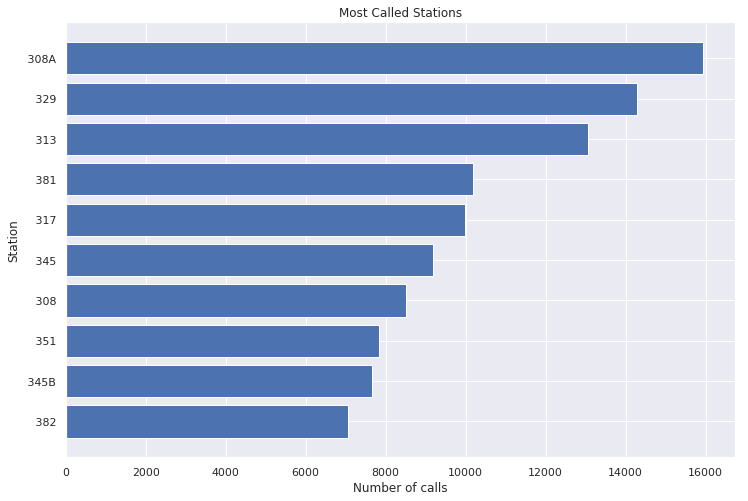

In [14]:
df_bar = df.station_num.str.replace(':', '').value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df_bar.index)
y = list(df_bar.values)
x.reverse()
y.reverse()

plt.title("Most Called Stations")
plt.ylabel("Station")
plt.xlabel("Number of calls")

plt.barh(x, y)

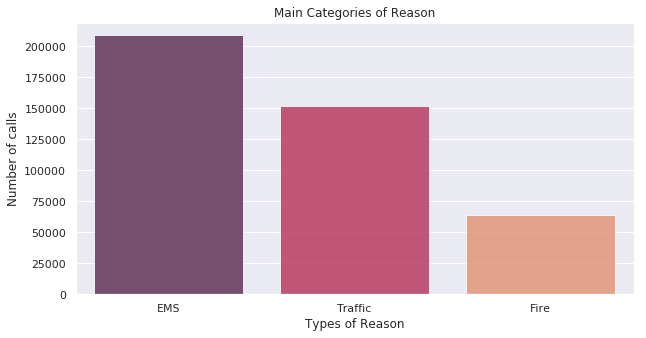

In [15]:
reason = df['Reason'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(reason.index, reason.values, alpha=0.8 , palette = 'rocket')
plt.title('Main Categories of Reason')
plt.ylabel('Number of calls', fontsize=12)
plt.xlabel('Types of Reason', fontsize=12)
plt.show()

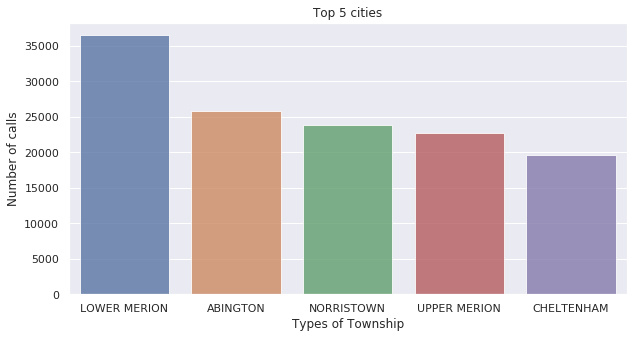

In [16]:
twp = df['twp'].value_counts()[:5]
plt.figure(figsize=(10,5))
sns.barplot(twp.index, twp.values, alpha=0.8)
plt.title('Top 5 cities')
plt.ylabel('Number of calls', fontsize=12)
plt.xlabel('Types of Township', fontsize=12)
plt.show()

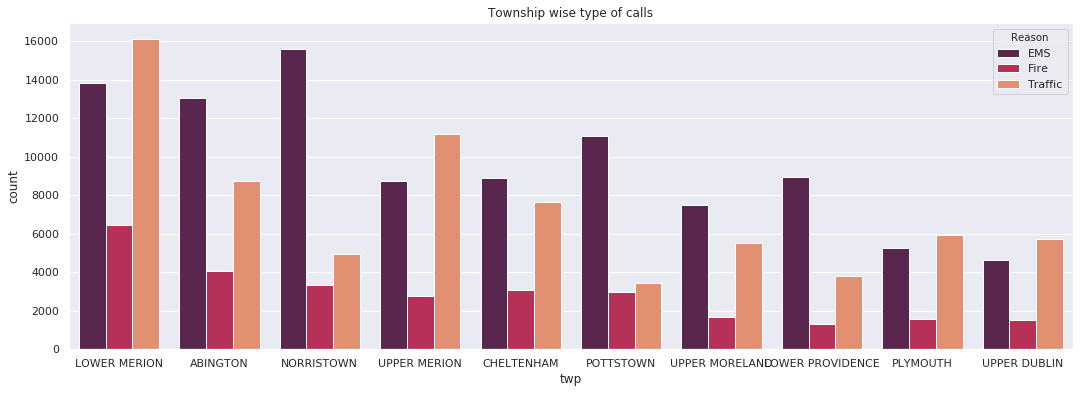

In [17]:
plt.figure(figsize=(18,6))
sns.countplot( x='twp',data=df,order=df['twp'].value_counts().index[:10], hue='Reason', palette='rocket')
plt.title('Township wise type of calls')
plt.show()

In [18]:
df["Day/Night"] = df["timeStamp"].apply(lambda x : "Night" if int(x.strftime("%H")) > 18 else "Day")
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,station_num,Reason,Hour,Month,Day of Week,Day/Night
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,332,EMS,17,December,Thursday,Day
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,345,EMS,17,December,Thursday,Day
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,:STA27,Fire,14,December,Thursday,Day
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,308A,EMS,16,December,Thursday,Day


In [19]:
df["Day/Night"].value_counts()

Day      346197
Night     77712
Name: Day/Night, dtype: int64

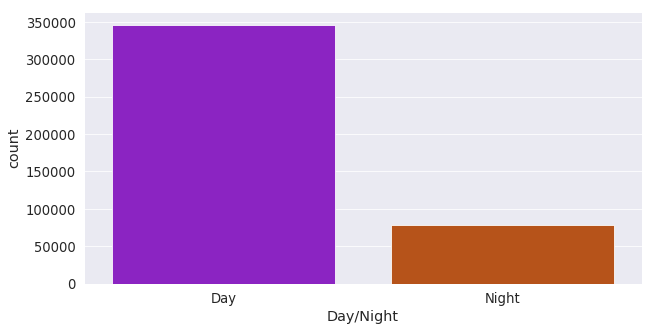

In [20]:
plt.figure(figsize=(10,5))
sns.set_context("paper", font_scale =1.5)
sns.countplot(x='Day/Night',data=df,palette='gnuplot')
sns.set_style("darkgrid")

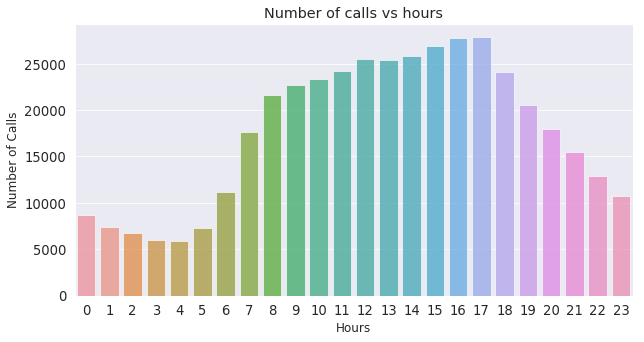

In [21]:
hour  = df['Hour'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(hour.index, hour.values, alpha=0.8)
plt.title('Number of calls vs hours')
plt.ylabel('Number of Calls', fontsize=12)
plt.xlabel('Hours', fontsize=12)
plt.show()

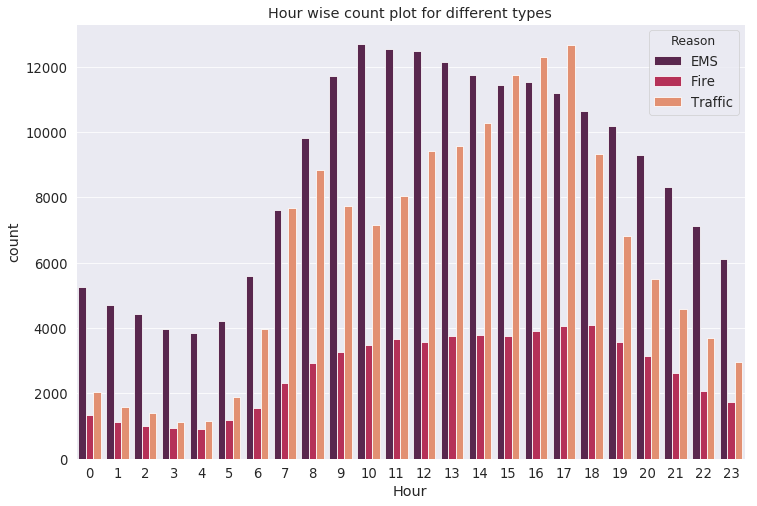

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='Hour',data=df,hue="Reason",palette = 'rocket' )
#plt.legend(loc=[0,1])
plt.title('Hour wise count plot for different types')
plt.show()

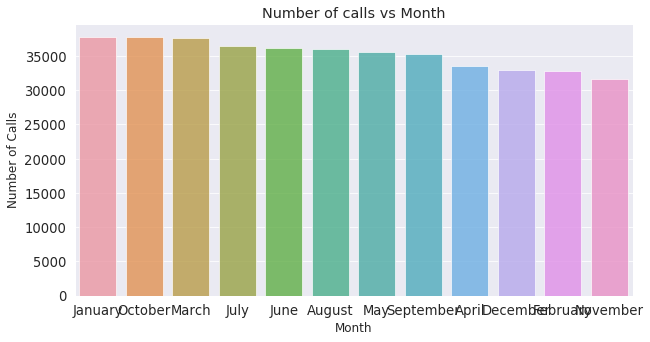

In [23]:
month  = df['Month'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(month.index, month.values, alpha=0.8)
plt.title('Number of calls vs Month')
plt.ylabel('Number of Calls', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

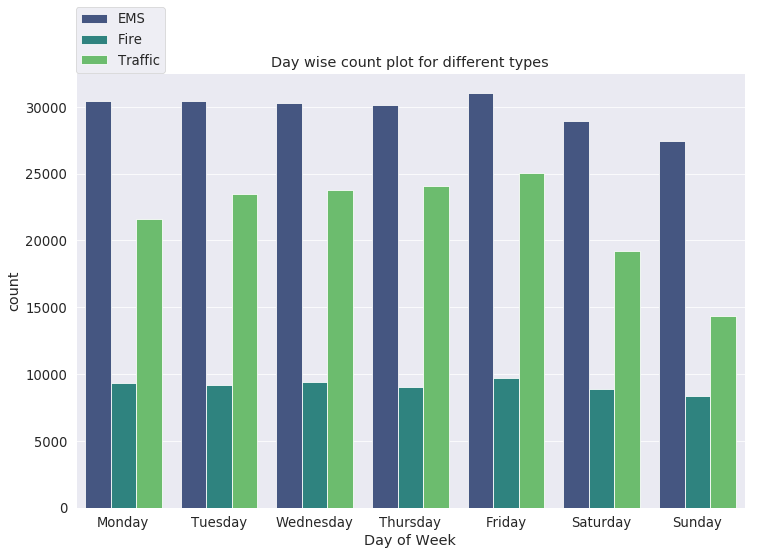

In [24]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(12,8))
sns.countplot(x='Day of Week',data=df,hue="Reason",order = days,palette = 'viridis')
plt.legend(loc=[0,1])
plt.title('Day wise count plot for different types')
plt.show()

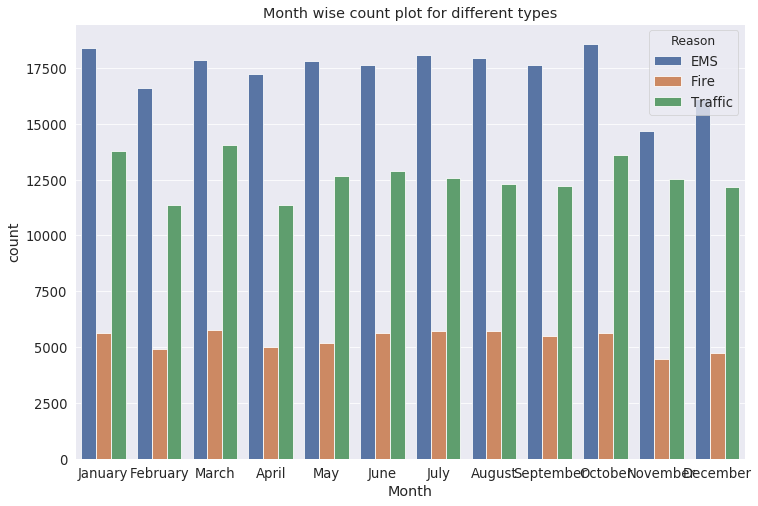

In [25]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(12,8))
sns.countplot(x='Month',data=df,hue="Reason",order = month,palette = 'deep') 
#plt.legend(loc=[0,1])
plt.title('Month wise count plot for different types')
plt.show()

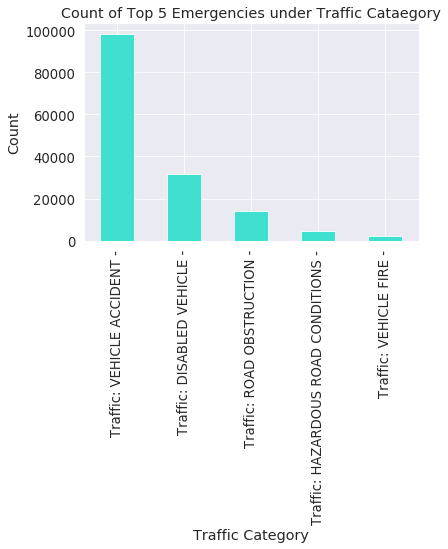

In [26]:
plt.xlabel('Traffic Category')
plt.ylabel('Count')
plt.title('Count of Top 5 Emergencies under Traffic Cataegory')
df["title"][df["title"].str.match("Traffic")].value_counts().sort_values(ascending=False).head().plot.bar(color = 'turquoise')
plt.show()

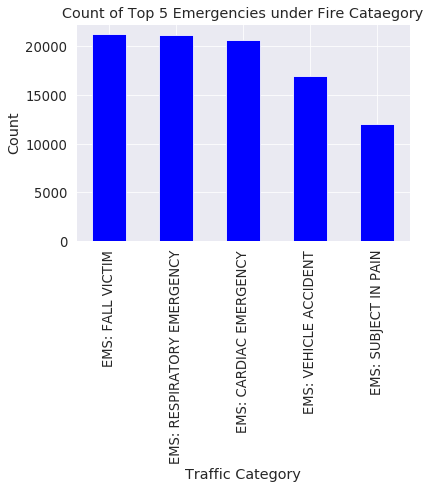

In [27]:
plt.xlabel('Traffic Category')
plt.ylabel('Count')
plt.title('Count of Top 5 Emergencies under Fire Cataegory')
df["title"][df["title"].str.match("EMS")].value_counts().sort_values(ascending=False).head().plot.bar(color = 'blue')
plt.show()

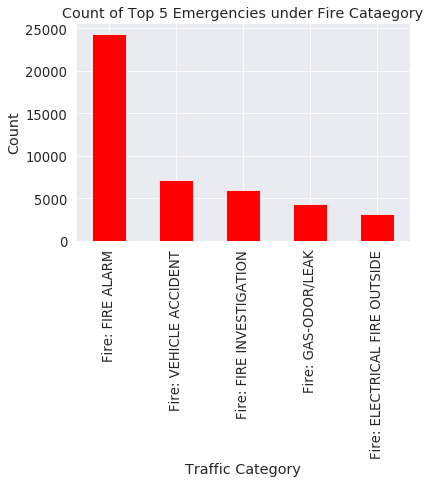

In [28]:
plt.xlabel('Traffic Category')
plt.ylabel('Count')
plt.title('Count of Top 5 Emergencies under Fire Cataegory')
df["title"][df["title"].str.match("Fire")].value_counts().sort_values(ascending=False).head().plot.bar(color = 'red')
plt.show()

In [29]:
#making time series
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['Date']=df['timeStamp'].apply(lambda t: t.date())

(array([735964., 736085., 736208., 736330., 736450., 736573., 736695.,
        736815., 736938.]),
 <a list of 9 Text xticklabel objects>)

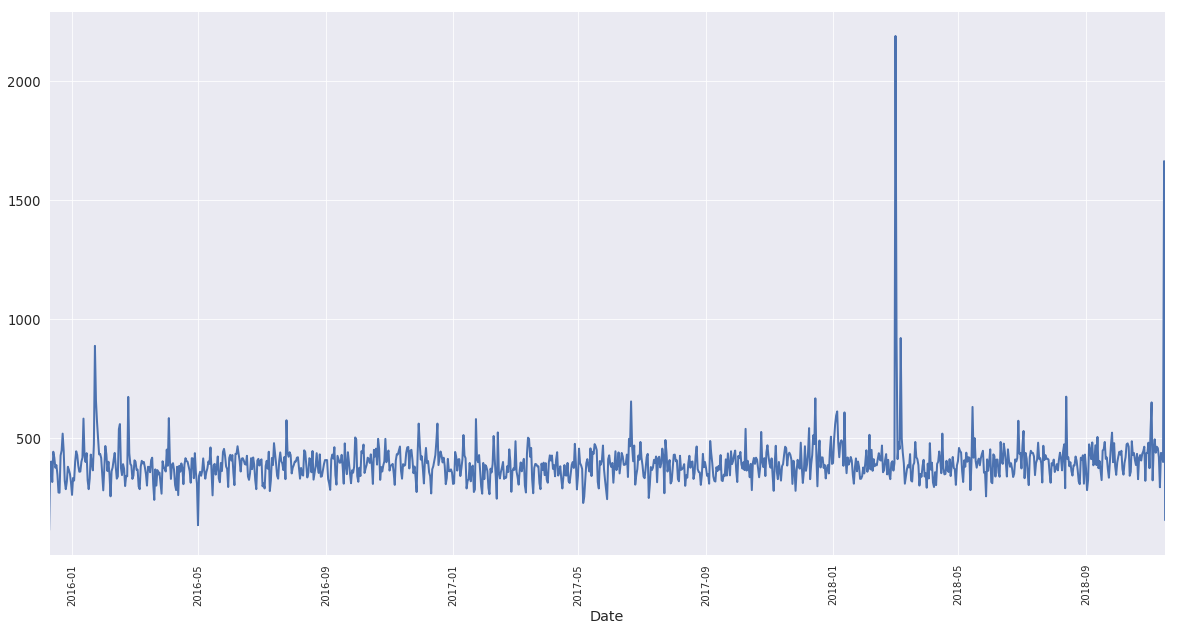

In [30]:
df.groupby('Date').count()['twp'].plot(linewidth=2 , figsize=(20, 10))

plt.xticks(rotation = 'vertical', size = 10)

(array([736695., 736726., 736754., 736785., 736815., 736846., 736876.,
        736907., 736938., 736968., 736999.]),
 <a list of 11 Text xticklabel objects>)

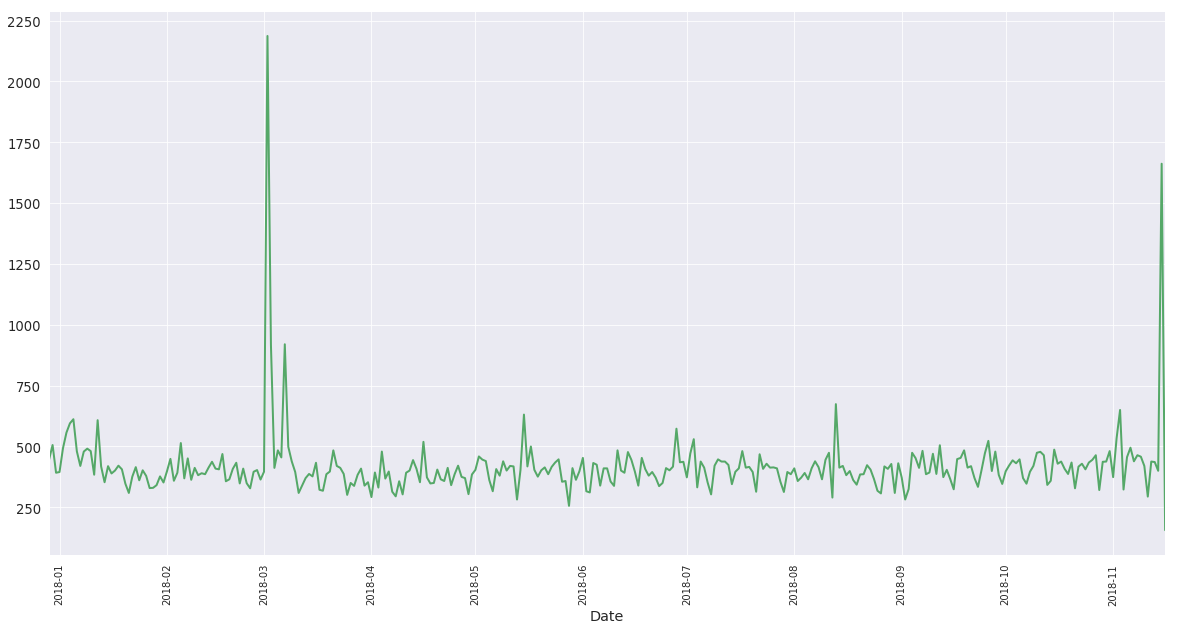

In [31]:
df.groupby('Date').count()['twp'][750::].plot(linewidth=2 , figsize=(20, 10) , color = 'g')

plt.xticks(rotation = 'vertical', size = 10)